In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [43]:
judge_2019 = pd.read_excel("data/2019.xlsx", "Sheet2")
judge_2019 = judge_2019.dropna()
judge_2019 = judge_2019.rename(columns={"County ": "County", "Population *": "Population", 
                           "Percentage of White People **": "Percentage of White People"})
judge_2019

,County,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,20094,32.0,11.0,0.343750,627.937500,1826.727273,0.927
1,Ashland County,15617,24.0,3.0,0.125000,650.708333,5205.666667,0.838
2,Barron County,45229,111.0,41.0,0.369369,407.468468,1103.146341,0.946
3,Bayfield County,14993,11.0,7.0,0.636364,1363.000000,2141.857143,0.861
4,Brown County,261368,1118.0,269.0,0.240608,233.781753,971.628253,0.843
...,...,...,...,...,...,...,...,...
68,Waupaca County,51245,112.0,10.0,0.089286,457.544643,5124.500000,0.962
69,Waushara County,24193,38.0,22.0,0.578947,636.657895,1099.681818,0.928
70,Winnebago County,170411,734.0,143.0,0.194823,232.167575,1191.685315,0.918
71,Wood County,73112,278.0,57.0,0.205036,262.992806,1282.666667,0.942


In [44]:
income = pd.read_csv("data/5year_est_income.csv")
income.columns = income.iloc[0, :]
income = income.iloc[1:, :]
income = income[['id', 'Geographic Area Name','Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Mean earnings (dollars) for full-time, year-round workers with earnings',
       'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Median earnings (dollars) for full-time, year-round workers with earnings']]
income = income.rename(columns = {'Geographic Area Name':'County', 'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Mean earnings (dollars) for full-time, year-round workers with earnings':'Mean income', 
                                  'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Median earnings (dollars) for full-time, year-round workers with earnings':'Median income'})
income['County'] = income['County'].map(lambda x: x[:-11])
income

,id,County,Mean income,Median income
1,0500000US55001,Adams County,48414,39410
2,0500000US55003,Ashland County,48075,41589
3,0500000US55005,Barron County,50323,40225
4,0500000US55007,Bayfield County,54186,44236
5,0500000US55009,Brown County,60689,47149
...,...,...,...,...
68,0500000US55133,Waukesha County,83908,62942
69,0500000US55135,Waupaca County,54379,44985
70,0500000US55137,Waushara County,52881,43710
71,0500000US55139,Winnebago County,59912,47048


In [45]:
merged = income.merge(judge_2019, on='County')
merged

,id,County,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,0500000US55001,Adams County,48414,39410,20094,32.0,11.0,0.343750,627.937500,1826.727273,0.927
1,0500000US55003,Ashland County,48075,41589,15617,24.0,3.0,0.125000,650.708333,5205.666667,0.838
2,0500000US55005,Barron County,50323,40225,45229,111.0,41.0,0.369369,407.468468,1103.146341,0.946
3,0500000US55007,Bayfield County,54186,44236,14993,11.0,7.0,0.636364,1363.000000,2141.857143,0.861
4,0500000US55009,Brown County,60689,47149,261368,1118.0,269.0,0.240608,233.781753,971.628253,0.843
...,...,...,...,...,...,...,...,...,...,...,...
67,0500000US55133,Waukesha County,83908,62942,400475,432.0,69.0,0.159722,927.025463,5803.985507,0.922
68,0500000US55135,Waupaca County,54379,44985,51245,112.0,10.0,0.089286,457.544643,5124.500000,0.962
69,0500000US55137,Waushara County,52881,43710,24193,38.0,22.0,0.578947,636.657895,1099.681818,0.928
70,0500000US55139,Winnebago County,59912,47048,170411,734.0,143.0,0.194823,232.167575,1191.685315,0.918


In [46]:
target = merged['Percentage Judgements to Filings']
features = merged[['Mean income', 'Median income']]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(features, target)
regr.coef_

array([ 4.81217179e-06, -1.58541442e-05])

<AxesSubplot:xlabel='Mean income'>

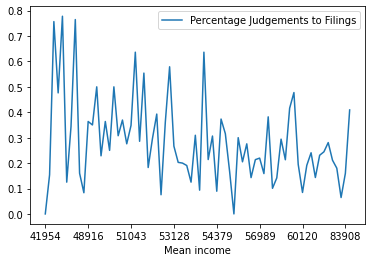

In [47]:
mean_income_judge = merged[['Mean income', 'Percentage Judgements to Filings']]
mean_income_judge = mean_income_judge.sort_values(by=["Mean income"])
mean_income_judge.plot(x='Mean income')

<AxesSubplot:xlabel='Median income'>

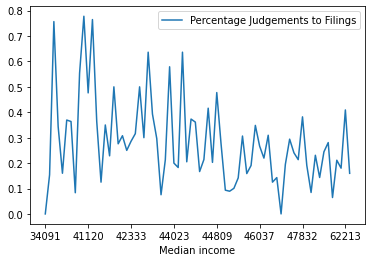

In [48]:
median_income_judge = merged[['Median income', 'Percentage Judgements to Filings']]
median_income_judge = median_income_judge.sort_values(by=["Median income"])
median_income_judge.plot(x='Median income')

In [49]:
cases = pd.read_csv("data/ccapoutputfile_20210706023712.csv")
cases = cases.drop(columns=['County'])
cases = cases.rename(columns={"CountyName": "County"})
cases


,CaseNumber,County,Name,FillingDate,Status,ModifiedDate,ZipCodes
0,2021SC015147,Milwaukee,Rosso Rei LLC,2021-06-30,Open,7/1/2021 3:26:14 PM,53210
1,2021SC015145,Milwaukee,251 Bradley Place LLC,2021-06-30,Open,7/1/2021 3:22:54 PM,53208
2,2021SC015143,Milwaukee,Shirlean Clayton,2021-06-30,Open,7/1/2021 3:20:41 PM,53225
3,2021SC015142,Milwaukee,Milwaukee Moderne LLC,2021-06-30,Open,7/1/2021 3:19:44 PM,53203
4,2021SC015068,Milwaukee,David Butler,2021-06-30,Open,7/1/2021 2:08:30 PM,53212
...,...,...,...,...,...,...,...
1390,2021SC000070,Forest,Darrell Ward,2021-06-14,Open,6/22/2021 8:39:42 PM,54566
1391,2021SC000068,Price,David Ames,2021-06-04,Closed,7/6/2021 4:59:25 PM,54459
1392,2021SC000051,Pepin,John Robelia,2021-06-08,Closed,7/1/2021 4:13:39 PM,54721
1393,2021SC000038,Iron,Chadwin Bucknell,2021-06-23,Open,6/23/2021 6:30:14 PM,54525


In [50]:
Agency = ["ADVOCAP", "CAP Services", "Central WI CAC", "Community Action, Inc.", "CouleeCAP",
          "Lakeshore CAP", "NewCAP", "NorthCentral CAP", "Northwest CSA", "Racine-Kenosha CAA",
          "Southwest CAP", "West CAP", "Western Dairyland EOC", "Community Advocates", "Social Development Commission",
          "Tenant Resource Center"]
Agency

['ADVOCAP',
 'CAP Services',
 'Central WI CAC',
 'Community Action, Inc.',
 'CouleeCAP',
 'Lakeshore CAP',
 'NewCAP',
 'NorthCentral CAP',
 'Northwest CSA',
 'Racine-Kenosha CAA',
 'Southwest CAP',
 'West CAP',
 'Western Dairyland EOC',
 'Community Advocates',
 'Social Development Commission',
 'Tenant Resource Center']

In [51]:
def map_state_to_agency(state):
    if state in ["Winnebago", "Calumet", "Fond du Lac", "Green Lake"]:
        return Agency[0]
    elif state in ["Portage" "Waupaca", "Outagamie", "Waushara", "Marquette"]:
        return Agency[1]
    elif state in ["Adams", "Juneau", "Sauk", "Columbia", "Dodge"]:
        return Agency[2]
    elif state in ["Rock", "Walworth"]:
        return Agency[3]
    elif state in ["La Crosse", "Monroe", "Vernon", "Crawford"]:
        return Agency[4]
    elif state in ["Door", "Kewaunee", "Manitowoc", "Sheboygan"]:
        return Agency[5]
    elif state in ["Vilas", "Oneida", "Langlade", "Menominee", "Shawano", "Oconto", "Marinette", "Forest", "Florence", "Brown"]:
        return Agency[6]
    elif state in ["Sawyer", "Rusk", "Taylor", "Lincoln", "Marathon", "Wood"]:
        return Agency[7]
    elif state in ["Douglas", "Bayfield", "Ashland", "Iron", "Price"]:
        return Agency[8]
    elif state in ["Racine", "Kenosha"]:
        return Agency[9]
    elif state in ["Richland", "Grant", "Iowa", "Lafayette", "Green"]:
        return Agency[10]
    elif state in ["Burnett", "Washburn", "Polk", "Barron", "St. Croix", "Dunn", "Chippewa", "Pierce", "Pepin"]:
        return Agency[11]
    elif state in ["Eau Claire", "Clark", "Buffalo", "Trempealeau", "Jackson"]:
        return Agency[12]
    elif state in ["Waukesha", "Milwaukee"]:
        return Agency[13]
    elif state in ["City of Milwaukee"]:
        return Agency[14]
    elif state in ["Dane"]:
        return Agency[15]
    else:
        return None


In [69]:
County_Agency = pd.DataFrame(merged["County"])
County_Agency["County"] = County_Agency["County"].map(lambda x: x[:-7])
col = []
for row in County_Agency[["County"]].itertuples():
    col.append(map_state_to_agency(row.County))
County_Agency["Agency"] = col
County_Agency

,County,Agency
0,Adams,Central WI CAC
1,Ashland,Northwest CSA
2,Barron,West CAP
3,Bayfield,Northwest CSA
4,Brown,NewCAP
...,...,...
67,Waukesha,Community Advocates
68,Waupaca,None
69,Waushara,CAP Services
70,Winnebago,ADVOCAP


In [78]:
cases = cases.merge(County_Agency, on='County')
cases


,CaseNumber,County,Name,FillingDate,Status,ModifiedDate,ZipCodes,Agency_x,Agency_y,Agency
0,2021SC015147,Milwaukee,Rosso Rei LLC,2021-06-30,Open,7/1/2021 3:26:14 PM,53210,Community Advocates,Community Advocates,Community Advocates
1,2021SC015145,Milwaukee,251 Bradley Place LLC,2021-06-30,Open,7/1/2021 3:22:54 PM,53208,Community Advocates,Community Advocates,Community Advocates
2,2021SC015143,Milwaukee,Shirlean Clayton,2021-06-30,Open,7/1/2021 3:20:41 PM,53225,Community Advocates,Community Advocates,Community Advocates
3,2021SC015142,Milwaukee,Milwaukee Moderne LLC,2021-06-30,Open,7/1/2021 3:19:44 PM,53203,Community Advocates,Community Advocates,Community Advocates
4,2021SC015068,Milwaukee,David Butler,2021-06-30,Open,7/1/2021 2:08:30 PM,53212,Community Advocates,Community Advocates,Community Advocates
...,...,...,...,...,...,...,...,...,...,...
1383,2021SC000070,Forest,Darrell Ward,2021-06-14,Open,6/22/2021 8:39:42 PM,54566,NewCAP,NewCAP,NewCAP
1384,2021SC000068,Price,David Ames,2021-06-04,Closed,7/6/2021 4:59:25 PM,54459,Northwest CSA,Northwest CSA,Northwest CSA
1385,2021SC000051,Pepin,John Robelia,2021-06-08,Closed,7/1/2021 4:13:39 PM,54721,West CAP,West CAP,West CAP
1386,2021SC000038,Iron,Chadwin Bucknell,2021-06-23,Open,6/23/2021 6:30:14 PM,54525,Northwest CSA,Northwest CSA,Northwest CSA


In [97]:
call_counts = pd.read_csv("211_counts_v2.csv")
call_counts = call_counts.drop("Unnamed: 0", axis=1, inplace=False)

In [98]:
# do the multiple regression
selected_columns = call_counts[["COUNTY", "DATE", "Housing & Shelter",
                                "(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
                                "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
                                "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
                                "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter"]]
selected_columns

,COUNTY,DATE,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter
0,Dodge,"Aug 1, 2019-Aug 31, 2019",21,4,4,0,10,1,2,0,0
1,Columbia,"Nov 1, 2019-Nov 30, 2019",2,0,0,0,2,0,0,0,0
2,Bayfield,"Jun 1, 2020-Jun 30, 2020",1,0,0,0,1,0,0,0,0
3,Buffalo,"Mar 1, 2021-Mar 31, 2021",7,1,3,1,2,0,0,0,0
4,Waupaca,"Apr 1, 2021-Apr 30, 2021",15,2,5,2,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2011,Walworth,"Mar 1, 2021-Mar 31, 2021",26,3,13,3,5,1,1,0,0
2012,Bayfield,"Jan 1, 2021-Jan 31, 2021",1,0,0,0,1,0,0,0,0
2013,Adams,"Sep 1, 2019-Sep 30, 2019",13,3,2,1,6,0,1,0,0
2014,Winnebago,"Mar 1, 2020-Mar 31, 2020",94,23,8,0,59,3,1,0,0


In [99]:
judge_2020 = pd.read_excel("data/2020.xlsx", "Sheet2")
judge_2020 = judge_2020.dropna()
judge_2020 = judge_2020.rename(columns={"County ": "County", "Population *": "Population",
                           "Percentage of White People **": "Percentage of White People"})
judge_2020

,County,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,Ashland County,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,Barron County,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,Bayfield County,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,Brown County,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...
68,Waupaca County,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,Waushara County,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,Winnebago County,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918
71,Wood County,73112,233.0,41.0,0.175966,313.785408,1783.219512,0.942


In [112]:
merged_2020 = income.merge(judge_2020, on='County')
merged_2020

,id,County,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,0500000US55001,Adams County,48414,39410,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,0500000US55003,Ashland County,48075,41589,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,0500000US55005,Barron County,50323,40225,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,0500000US55007,Bayfield County,54186,44236,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,0500000US55009,Brown County,60689,47149,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...,...,...,...
67,0500000US55133,Waukesha County,83908,62942,400475,349.0,52.0,0.148997,1147.492837,7701.442308,0.922
68,0500000US55135,Waupaca County,54379,44985,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,0500000US55137,Waushara County,52881,43710,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,0500000US55139,Winnebago County,59912,47048,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918


In [118]:
selected_columns_2020 = selected_columns[selected_columns["DATE"].str.contains("2020")]
selected_columns_2020 = selected_columns.groupby("COUNTY", as_index = False).sum()
selected_columns_2020

,COUNTY,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter
0,Adams,369,63,46,48,185,16,11,0,0
1,Ashland,71,16,10,1,39,5,0,0,0
2,Barron,294,47,37,14,165,22,7,0,2
3,Bayfield,33,6,2,2,18,4,1,0,0
4,Brown,4243,1213,862,125,1689,97,226,7,22
...,...,...,...,...,...,...,...,...,...,...
67,Waukesha,3914,1253,885,156,1263,87,250,4,16
68,Waupaca,510,58,90,22,290,27,20,2,1
69,Waushara,272,24,52,30,138,17,11,0,0
70,Winnebago,2774,571,628,82,1294,64,122,1,12


In [119]:
def change_county(df):
    return df["COUNTY"] + " County"
selected_columns_2020["COUNTY"] = selected_columns_2020.apply(lambda x:change_county(x), axis=1)
selected_columns_2020 = selected_columns_2020.rename(columns={"COUNTY": "County"})
selected_columns_2020

,County,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter
0,Adams County,369,63,46,48,185,16,11,0,0
1,Ashland County,71,16,10,1,39,5,0,0,0
2,Barron County,294,47,37,14,165,22,7,0,2
3,Bayfield County,33,6,2,2,18,4,1,0,0
4,Brown County,4243,1213,862,125,1689,97,226,7,22
...,...,...,...,...,...,...,...,...,...,...
67,Waukesha County,3914,1253,885,156,1263,87,250,4,16
68,Waupaca County,510,58,90,22,290,27,20,2,1
69,Waushara County,272,24,52,30,138,17,11,0,0
70,Winnebago County,2774,571,628,82,1294,64,122,1,12


In [120]:
multi_re_df = selected_columns_2020.merge(merged_2020, on='County')

multi_re_df

,County,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter,id,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,369,63,46,48,185,16,11,0,0,0500000US55001,48414,39410,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,Ashland County,71,16,10,1,39,5,0,0,0,0500000US55003,48075,41589,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,Barron County,294,47,37,14,165,22,7,0,2,0500000US55005,50323,40225,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,Bayfield County,33,6,2,2,18,4,1,0,0,0500000US55007,54186,44236,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,Brown County,4243,1213,862,125,1689,97,226,7,22,0500000US55009,60689,47149,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Waukesha County,3914,1253,885,156,1263,87,250,4,16,0500000US55133,83908,62942,400475,349.0,52.0,0.148997,1147.492837,7701.442308,0.922
68,Waupaca County,510,58,90,22,290,27,20,2,1,0500000US55135,54379,44985,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,Waushara County,272,24,52,30,138,17,11,0,0,0500000US55137,52881,43710,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,Winnebago County,2774,571,628,82,1294,64,122,1,12,0500000US55139,59912,47048,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918


In [135]:
train_col = ["(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
        "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
         "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
         "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter"]

calls_211_model = linear_model.LinearRegression()
calls_211_model.fit(multi_re_df[train_col], multi_re_df["2020 Filings"])

# calculate the R squared
calls_211_model.score(multi_re_df[train_col], multi_re_df["2020 Filings"])

0.9951691029650477

Text(0.5, 1.0, 'Figure: Multiple Regression Coefficients')

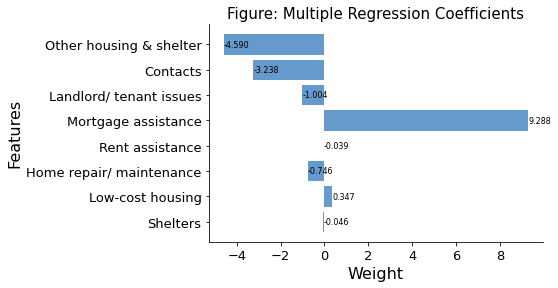

In [137]:
# draw the coefficient plot
import re
a=r'\(.*?\)'
idx = [re.sub(a, '', t).strip() for t in train_col]
fig, ax = plt.subplots()

ax3 = ax.barh(range(len(idx)), calls_211_model.coef_, color='#6699CC')
ax.tick_params(labelsize=13)
for rect in ax3:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2,
            "%.3f" % w, ha='left', va='center', fontsize = 8)
ax.set_yticks(range(len(idx)))
ax.set_yticklabels(idx)
ax.set_xlabel("Weight", fontsize=16)
ax.set_ylabel("Features", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure: Multiple Regression Coefficients", fontsize=15)


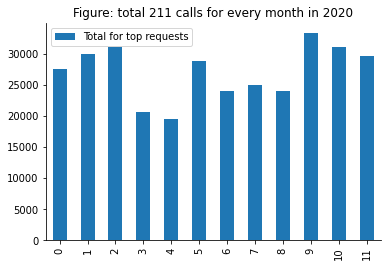

In [158]:
# more plots
calls_2020 = call_counts[call_counts["DATE"].str.contains("2020")]
calls_2020 = calls_2020[["COUNTY", "DATE","Total for top requests"]]
ax2 = calls_2020.groupby('DATE', as_index=False).sum().plot(kind='bar')
ax2.set_title("Figure: total 211 calls for every month in 2020")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

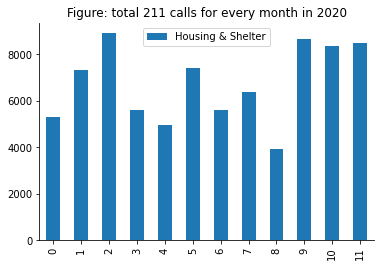

In [159]:
calls_2020 = call_counts[call_counts["DATE"].str.contains("2020")]
calls_2020 = calls_2020[["COUNTY", "DATE","Housing & Shelter"]]
ax2 = calls_2020.groupby('DATE', as_index=False).sum().plot(kind='bar')
ax2.set_title("Figure: total 211 calls for every month in 2020")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)